In [1]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Python: {}'.format(scipy.version))
import numpy
print('Python: {}'.format(numpy.version))
import matplotlib
print('Python: {}'.format(matplotlib))
import pandas
print('Python: {}'.format(pandas))
import sklearn
print('Python: {}'.format(sklearn))


Python: 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
Python: <module 'scipy.version' from 'd:\\1. Project\\Python\\mlvenv\\Lib\\site-packages\\scipy\\version.py'>
Python: <module 'numpy.version' from 'd:\\1. Project\\Python\\mlvenv\\Lib\\site-packages\\numpy\\version.py'>
Python: <module 'matplotlib' from 'd:\\1. Project\\Python\\mlvenv\\Lib\\site-packages\\matplotlib\\__init__.py'>
Python: <module 'pandas' from 'd:\\1. Project\\Python\\mlvenv\\Lib\\site-packages\\pandas\\__init__.py'>
Python: <module 'sklearn' from 'd:\\1. Project\\Python\\mlvenv\\Lib\\site-packages\\sklearn\\__init__.py'>


In [2]:
from pandas import read_excel
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
url = "../../data/processed/den/bola12345.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset = read_excel(url, names=names, header=None)

print(dataset.head(5))

   lam_max1      csc_max1  lam_min       csc_min  lam_fwhm1         c_mid  \
0       408  2.774638e-14      434  2.264798e-14        464  4.239645e-14   
1       410  2.984472e-14      432  2.725996e-14        464  4.555423e-14   
2       362  2.400898e-14      390  1.436011e-14        442  4.153600e-14   
3       364  2.971955e-14      392  1.702803e-14        412  4.696978e-14   
4       366  3.552294e-14      392  1.962838e-14        412  5.500586e-14   

   lam_max2      csc_max2  lam_fwhm2  fwhm  ...  posisi2  posisi3  posisi4  \
0       474  6.214492e-14        484    20  ...        0        0        0   
1       474  6.384849e-14        484    20  ...        0        0        0   
2       472  6.871189e-14        488    46  ...        0        0        0   
3       470  7.691152e-14        488    76  ...        0        0        0   
4       462  9.038334e-14        488    76  ...        0        0        0   

   posisi5  arah_k  arah_E  sb_putar  sudut1  sudut2  ket  
0       

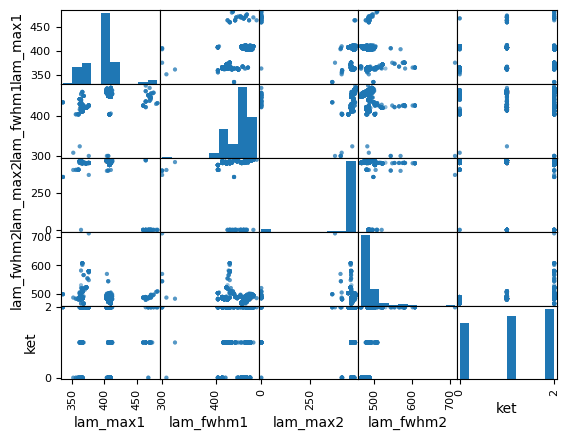

In [4]:
#scatter_matrix(dataset[['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','ket']])
scatter_matrix(dataset[['lam_max1', 'lam_fwhm1','lam_max2','lam_fwhm2','ket']])
plt.show()

In [10]:
# Split-out validation dataset
array = dataset
X = array.iloc[:,0:10].values
y = array.iloc[:,20].values
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, y, test_size=0.5,
    random_state=1
)

print(len(Y_train))
print(len(Y_validation))
print(len(Y_validation)/(len(Y_train) + len(Y_validation)))

850
851
0.5002939447383892


In [11]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.530588 (0.041176)
LDA: 0.717647 (0.032941)
KNN: 0.905882 (0.009412)
CART: 0.930588 (0.010588)
NB: 0.495294 (0.022353)
SVM: 0.918824 (0.010588)


In [ ]:
results

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [12]:
# Make predictions on validation dataset
model1 = SVC(gamma='auto')
model1.fit(X_train, Y_train)
Y_predict = model1.predict(X_validation)

In [13]:
# Evaluate predictions using SVM
print("accurancy = ",
     accuracy_score(
         Y_validation, Y_predict))
cf = confusion_matrix(Y_validation, Y_predict)
print("\nconfusion matrix =\n", cf)

print("\nreport = \n", 
     classification_report(
         Y_validation, Y_predict))

accurancy =  0.9341950646298472

confusion matrix =
 [[220   0  37]
 [  0 277  12]
 [  7   0 298]]

report = 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       257
           1       1.00      0.96      0.98       289
           2       0.86      0.98      0.91       305

    accuracy                           0.93       851
   macro avg       0.94      0.93      0.93       851
weighted avg       0.94      0.93      0.93       851



In [15]:
# Make predictions on validation dataset
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)
Y_predict = model2.predict(X_validation)

In [16]:
print("accurancy = ",
     accuracy_score(
         Y_validation, Y_predict))
cf = confusion_matrix(Y_validation, Y_predict)
print("\nconfusion matrix =\n", cf)

print("\nreport = \n", 
     classification_report(
         Y_validation, Y_predict))

accurancy =  0.9247943595769683

confusion matrix =
 [[230   2  25]
 [  0 277  12]
 [ 22   3 280]]

report = 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       257
           1       0.98      0.96      0.97       289
           2       0.88      0.92      0.90       305

    accuracy                           0.92       851
   macro avg       0.93      0.92      0.92       851
weighted avg       0.93      0.92      0.93       851



## test

In [ ]:
url2 = "../../data/processed/den/bola12345.xlsx"
names2 = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset2 = read_excel(url2, names=names2, header=None)

array2 = dataset2
print(len (array2))
X_test5 = array2.iloc[151:157,0:10].values
y_test5 = array2.iloc[151:157,20].values
X_test6 = array2.iloc[11:17,0:10].values
y_test6 = array2.iloc[11:17,20].values
X_test7 = array2.iloc[291:301,0:10].values
y_test7 = array2.iloc[291:301,20].values

predictions = model1.predict(X_test5)
print(predictions)
print(y_test5)

predictions = model1.predict(X_test6)
print(predictions)
print(y_test6)

predictions = model1.predict(X_test7)
print(predictions)
print(y_test7)


## Data uji eksperimen dua bola dengan data latih full

In [8]:
url3 = "../../data/processed/den/Exp_2bola.xlsx"
names2 = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset3 = read_excel(url3, names=names2, header=None)

array3 = dataset3
print(len (array3))
X_ntest = array3.iloc[:,0:10].values
Y_ntest = array3.iloc[:,20].values

Y_npredict = model1.predict(X_ntest)
print(Y_npredict)
print(Y_ntest)


4
[2 2 2 2]
[0 0 2 2]


In [ ]:
dataset3

In [9]:
# Evaluate predictions using SVM
print("accurancy = ",
     accuracy_score(
         Y_ntest, Y_npredict))
cf = confusion_matrix(Y_ntest, Y_npredict)
print("\nconfusion matrix =\n", cf)

print("\nreport = \n", 
     classification_report(
         Y_ntest, Y_npredict))

accurancy =  0.5

confusion matrix =
 [[0 2]
 [0 2]]

report = 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



d:\1. Project\Python\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1. Project\Python\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1. Project\Python\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dataset['ket'].value_counts()

In [ ]:
dataset3['ket'].value_counts()